In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedGroupKFold 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import cv2
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.preprocessing import LabelEncoder

c:\Users\MSI_PC\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_train = pd.read_csv("E:\\Lomba\\Find It\\hasil_prepo_encoded_5.csv")
data_train

,userRatingCount,downloads,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,...,dev_iso_VN,dev_iso_YE,dev_iso_ZA,dev_iso_ZW,dev_region_APAC,dev_region_EMEA,dev_region_LATAM,dev_region_MEA,dev_region_NA,dev_region_UNKNOWN
0,127731,750.0,1,1,0,1,14.017220,160.400000,4.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,75.0,1,0,1,1,7.945580,17.500000,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,51143,75000000.0,1,1,0,0,31.883163,30.766667,4.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1074,750.0,1,0,1,1,7.945580,71.533333,4.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,17,3000.0,1,0,1,1,7.945580,52.400000,4.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,750.0,1,0,1,1,7.945580,26.266667,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6996,0,750.0,1,0,1,0,7.945580,23.800000,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6997,0,30.0,1,0,1,0,7.945580,27.500000,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6998,0,30.0,1,0,1,1,7.945580,124.033333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
data_test = pd.read_csv("E:\\Lomba\\Find It\\hasil_test_encoded_5.csv")
data_test

,ID,userRatingCount,downloads,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,...,dev_iso_VC,dev_iso_VN,dev_iso_YE,dev_iso_ZA,dev_region_APAC,dev_region_EMEA,dev_region_LATAM,dev_region_MEA,dev_region_NA,dev_region_UNKNOWN
0,2807,2,750.0,1,0,1,0,7.186537,81.600000,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1742,0,7500.0,1,1,0,0,0.027742,24.700000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,806,13059,750.0,1,0,1,1,9.249056,40.300000,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2635,0,750.0,1,0,1,0,7.186537,39.233333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9047,0,750.0,1,0,1,0,7.186537,65.533333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2288,0,750.0,1,1,0,0,7.186537,94.100000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2996,5541,10,300.0,1,0,1,1,7.186537,25.033333,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2997,9259,2,750.0,1,0,1,0,7.186537,76.000000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2998,3477,0,3.0,1,0,1,1,7.186537,100.633333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
data_train['log_downloads'] = np.log1p(data_train['downloads'])
data_train['log_adSpent'] = np.log1p(data_train['adSpent'])
data_train['log_userRatingCount'] = np.log1p(data_train['userRatingCount'])

In [37]:
data_test['log_downloads'] = np.log1p(data_test['downloads'])
data_test['log_adSpent'] = np.log1p(data_test['adSpent'])
data_test['log_userRatingCount'] = np.log1p(data_test['userRatingCount'])

In [38]:
data_train['appAge_group'] = pd.cut(data_train['appAge'], 
                                    bins=[-1,30,180,10000], 
                                    labels=['new','mid','old'])

In [39]:
data_test['appAge_group'] = pd.cut(data_test['appAge'], 
                                    bins=[-1,30,180,10000], 
                                    labels=['new','mid','old'])

In [40]:
data_train['rating_x_count'] = data_train['averageUserRating'] * data_train['userRatingCount']
data_train['adSpent_per_day'] = data_train['adSpent'] / (data_train['appAge'] + 1)  # +1 biar ga divide by zero

In [41]:
data_test['rating_x_count'] = data_test['averageUserRating'] * data_test['userRatingCount']
data_test['adSpent_per_day'] = data_test['adSpent'] / (data_test['appAge'] + 1)  # +1 biar ga divide by zero

In [42]:
top_download_thresh_train = data_train['downloads'].quantile(0.90)
data_train['is_top_download'] = (data_train['downloads'] > top_download_thresh_train).astype(int)

In [43]:
top_download_thresh_test = data_test['downloads'].quantile(0.90)
data_test['is_top_download'] = (data_test['downloads'] > top_download_thresh_test).astype(int)

In [44]:
le = LabelEncoder()
data_train['appAge_group_enc'] = le.fit_transform(data_train['appAge_group'].astype(str))
data_test['appAge_group_enc'] = le.fit_transform(data_test['appAge_group'].astype(str))

In [45]:
data_train.drop(['appAge_group'], axis=1, inplace=True)   
data_test.drop(['appAge_group'], axis=1, inplace=True)   

In [46]:
train_features = data_train.drop(columns=['coppaRisk'], errors='ignore').columns
test_features = data_test.columns

missing_in_test = set(train_features) - set(test_features)

# Tampilkan hasil
print("Jumlah fitur yang hilang di test:", len(missing_in_test))
print("Fitur yang hilang di test:")
for col in sorted(missing_in_test):
    print(col)

Jumlah fitur yang hilang di test: 73
Fitur yang hilang di test:
countryCode_AF
countryCode_AT
countryCode_BG
countryCode_BH
countryCode_BJ
countryCode_CD
countryCode_CM
countryCode_CY
countryCode_DJ
countryCode_DK
countryCode_EE
countryCode_GE
countryCode_GR
countryCode_GU
countryCode_GY
countryCode_HN
countryCode_HR
countryCode_IR
countryCode_JM
countryCode_JO
countryCode_LK
countryCode_MK
countryCode_MM
countryCode_MN
countryCode_NI
countryCode_NZ
countryCode_PA
countryCode_PR
countryCode_PY
countryCode_RE
countryCode_SD
countryCode_SK
countryCode_SN
countryCode_SX
countryCode_UY
dev_iso_AD
dev_iso_AL
dev_iso_AO
dev_iso_BE
dev_iso_BH
dev_iso_BI
dev_iso_BN
dev_iso_BZ
dev_iso_DO
dev_iso_DZ
dev_iso_GH
dev_iso_GI
dev_iso_GL
dev_iso_GR
dev_iso_GT
dev_iso_HN
dev_iso_IM
dev_iso_IQ
dev_iso_KG
dev_iso_KY
dev_iso_LB
dev_iso_LT
dev_iso_MN
dev_iso_MV
dev_iso_NG
dev_iso_NI
dev_iso_OM
dev_iso_PA
dev_iso_PE
dev_iso_PT
dev_iso_QA
dev_iso_SN
dev_iso_TW
dev_iso_UZ
dev_iso_VE
dev_iso_VG
dev_iso_ZW
genr

In [47]:
missing_features = [
    'countryCode_AF', 'countryCode_AT', 'countryCode_BG', 'countryCode_BH', 'countryCode_BJ',
    'countryCode_CD', 'countryCode_CM', 'countryCode_CY', 'countryCode_DJ', 'countryCode_DK',
    'countryCode_EE', 'countryCode_GE', 'countryCode_GR', 'countryCode_GU', 'countryCode_GY',
    'countryCode_HN', 'countryCode_HR', 'countryCode_IR', 'countryCode_JM', 'countryCode_JO',
    'countryCode_LK', 'countryCode_MK', 'countryCode_MM', 'countryCode_MN', 'countryCode_NI',
    'countryCode_NZ', 'countryCode_PA', 'countryCode_PR', 'countryCode_PY', 'countryCode_RE',
    'countryCode_SD', 'countryCode_SK', 'countryCode_SN', 'countryCode_SX', 'countryCode_UY',
    'dev_iso_AD', 'dev_iso_AL', 'dev_iso_AO', 'dev_iso_BE', 'dev_iso_BH', 'dev_iso_BI',
    'dev_iso_BN', 'dev_iso_BZ', 'dev_iso_DO', 'dev_iso_DZ', 'dev_iso_GH', 'dev_iso_GI',
    'dev_iso_GL', 'dev_iso_GR', 'dev_iso_GT', 'dev_iso_HN', 'dev_iso_IM', 'dev_iso_IQ',
    'dev_iso_KG', 'dev_iso_KY', 'dev_iso_LB', 'dev_iso_LT', 'dev_iso_MN', 'dev_iso_MV',
    'dev_iso_NG', 'dev_iso_NI', 'dev_iso_OM', 'dev_iso_PA', 'dev_iso_PE', 'dev_iso_PT',
    'dev_iso_QA', 'dev_iso_SN', 'dev_iso_TW', 'dev_iso_UZ', 'dev_iso_VE', 'dev_iso_VG',
    'dev_iso_ZW', 'genre_Magazines & Newspapers'
]

In [48]:
data_train = data_train.drop(columns=missing_features)

In [49]:
data_test = data_test[data_train.columns.drop('coppaRisk')]

In [50]:
X = data_train.drop(columns='coppaRisk')
y = data_train['coppaRisk']

In [51]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Columns: 241 entries, userRatingCount to appAge_group_enc
dtypes: float64(179), int32(2), int64(60)
memory usage: 12.8 MB


# model

In [52]:
scale_pos_weight = len(y[y == 0]) / len(y[y==1])
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'lambda': trial.suggest_float('lambda', 0, 5),
        'alpha': trial.suggest_float('alpha', 0, 5),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 10)
    }

    model = XGBClassifier(**params)
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    return np.mean(scores)

In [53]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50,timeout=1200)

print('Best AUC score : ',study.best_value)
print('Best Hyperparameters : ',study.best_params)

[I 2025-04-23 09:19:15,647] A new study created in memory with name: no-name-0ad2c261-e5de-4bb5-ad14-d9206ddbfedc
[I 2025-04-23 09:19:38,401] Trial 0 finished with value: 0.8503707528660591 and parameters: {'max_depth': 5, 'learning_rate': 0.19895690880176456, 'n_estimators': 593, 'subsample': 0.5927784124135564, 'colsample_bytree': 0.5427712847820043, 'gamma': 0.45516285493709174, 'min_child_weight': 2, 'lambda': 1.7161175617383062, 'alpha': 1.656346051364637, 'scale_pos_weight': 9.205095697449217}. Best is trial 0 with value: 0.8503707528660591.
[I 2025-04-23 09:19:51,747] Trial 1 finished with value: 0.8811395063463381 and parameters: {'max_depth': 7, 'learning_rate': 0.2719711280844986, 'n_estimators': 265, 'subsample': 0.7248889865429202, 'colsample_bytree': 0.646416448704118, 'gamma': 1.7929936804814461, 'min_child_weight': 7, 'lambda': 4.635741816702849, 'alpha': 2.5798920098727347, 'scale_pos_weight': 0.775260400489589}. Best is trial 1 with value: 0.8811395063463381.
[I 2025-0

Best AUC score :  0.8892500358676628
Best Hyperparameters :  {'max_depth': 3, 'learning_rate': 0.047435180337611085, 'n_estimators': 148, 'subsample': 0.8947447025640768, 'colsample_bytree': 0.6058873311480847, 'gamma': 4.470527046940044, 'min_child_weight': 6, 'lambda': 2.064349388832296, 'alpha': 3.1810576788421723, 'scale_pos_weight': 8.629025842156167}


In [54]:
best_model = XGBClassifier(
    **study.best_params,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

best_model.fit(X,y)

c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(alpha=3.1810576788421723, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6058873311480847, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=4.470527046940044, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              lambda=2.064349388832296, learning_rate=0.047435180337611085,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=148, n_jobs=None, num_parallel_tree=None, ...)

In [55]:
y_prob = best_model.predict_proba(data_test)[:, 1]

In [56]:
scores = cross_val_score(best_model,X,y,cv=5,scoring='roc_auc')
print('auc score : ',scores.mean())

c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


auc score :  0.8889527480509564


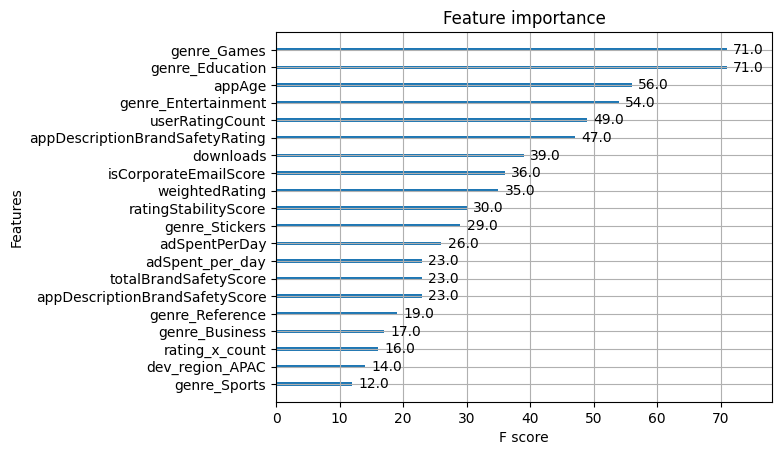

In [57]:
import xgboost as xgb

xgb.plot_importance(best_model,max_num_features=20)
plt.show()

In [58]:
importances = best_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance':importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance',ascending=False)
print(feat_imp_df.head(20))

                             Feature  Importance
36                       genre_Games    0.193654
31                   genre_Education    0.156227
32               genre_Entertainment    0.059518
0                    userRatingCount    0.043619
66           deviceType_clean_Global    0.041801
13                    weightedRating    0.038106
17    appDescriptionBrandSafetyScore    0.038053
236                   rating_x_count    0.032909
18             totalBrandSafetyScore    0.030541
26                    genre_Business    0.028005
10   appDescriptionBrandSafetyRating    0.022343
60                       genre_Tools    0.021849
235              log_userRatingCount    0.020407
59                    genre_Stickers    0.018024
41                   genre_Lifestyle    0.016799
55                    genre_Shopping    0.013349
54                   genre_Reference    0.012255
1                          downloads    0.011455
232               dev_region_UNKNOWN    0.010907
45               gen

In [59]:
submission = pd.read_csv("E:\\Lomba\\Find It\\data-analytics-competition-find-it-2025\\dataset\\submission_format.csv")
data_test = pd.read_csv("E:\\Lomba\\Find It\\hasil_test_encoded_5.csv")
submission = pd.DataFrame({
    'ID' : data_test['ID'],
    'coppaRisk' : y_prob
})
submission.to_csv('submission_19.csv',index=False)

# Submission_19.csv : 0.89368